<a href="https://colab.research.google.com/github/DaissyM/I_A/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

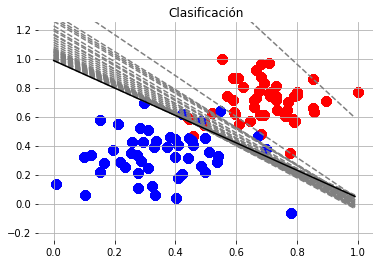

In [ ]:
#%% lLIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d

#%%
#cargar datos
datos = np.asarray(pd.read_csv("https://raw.githubusercontent.com/sadoky/inteligencia-_articial_ELECT/main/data.csv"))


#llenar datos de X_test(x1,x2) y Y_test
data= np.array(datos)
#print(data)
X_test=[]
Y_test=[]
for i in range(100):
    X_test.append([data[i,0],data[i,1]])
    Y_test.append(data[i,2])
X_test=np.array(X_test) #puntos x
Y_test=np.array(Y_test) #valor de clasificacion 0 o 1

#%% establecer recta
m=1
i=1
#Función Lineal original ecuacion 3X1+4X2-10=0
def recta(m,i,linestyle='dashed', color='gray', fill=False):
    x0 = np.arange(0,1, 0.01)
    plt.plot(x0, m*x0+i, linestyle=linestyle, color=color)


#%% definir pesos (W), bias (b) y tasa de aprendizaje 

W_test = np.array([[0.3], [0.5]])
b_test = 1 #umbral o ballas 
learn_rate=0.01
pesos=np.random.uniform(-1,1, size=2)
b=np.random.uniform(-1,1) #umbral
boundary_lines=[]

#%% Funciones 
#funcion escalon
def escalon(t):
    if t>=0:
        return 1
    else:
        return 0
#multiplicacion valores XW+b
def activacion(X,W,b):
     z=((np.matmul(X,W)+b))
     return escalon(z)
 
#Correccion valores W, b perceptron
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        valor = activacion(X[i],W,b)
        if y[i]-valor == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-valor == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
 

#%%
epocas=40
for epoca in range(epocas):
    W,b = perceptronStep(X_test,Y_test,W_test,b_test,learn_rate)
    boundary_lineas = np.zeros([2])
    boundary_lineas[0] = -W[0]/W[1]
    boundary_lineas[1] = -b/W[1]
    plt.title("Clasificación")
    plt.scatter(X_test[Y_test ==0].T[0],
            X_test[Y_test ==0].T[1],
            marker="o",s=50,color="red",
            linewidths=3,label="Bias= 0")
    plt.scatter(X_test[Y_test ==1].T[0],
            X_test[Y_test ==1].T[1],
            marker="o",s=50,color="blue",
            linewidths=3,label="Bias= 1")
    recta(boundary_lineas[0], boundary_lineas[1])
      
recta(boundary_lineas[0], boundary_lineas[1], 'solid', 'k', True)
plt.box(False)
plt.grid()
plt.ylim(-0.25,1.25)
plt.show()
